In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [30]:
df = pd.read_csv('battle_logs.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   469 non-null    object 
 1   Time                   469 non-null    object 
 2   Agent_X_Type           469 non-null    object 
 3   Agent_O_Type           469 non-null    object 
 4   Winner                 469 non-null    object 
 5   Num_Moves              469 non-null    int64  
 6   Game_Duration_Seconds  469 non-null    float64
 7   Final_Board_State      469 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 29.4+ KB


In [31]:
df.head()

,Date,Time,Agent_X_Type,Agent_O_Type,Winner,Num_Moves,Game_Duration_Seconds,Final_Board_State
0,2025-04-19,16:51:22,Medium,Random,X,41,1.65,XO OOXXOOXXX OOOO X O X X OO OOX O O ...
1,2025-04-19,16:51:23,Learning,Medium,O,54,0.99,XOOXOXO XX X O XX XOXOOOO O XO O OXO XOXXXO...
2,2025-04-19,16:51:23,Easy,Easy,X,35,0.08,XOOOOO XOXX X XOXOOO XOXOX X XXOXO X X...
3,2025-04-19,16:51:24,Easy,Easy,X,35,0.08,XOOOOO XOXX X XOXOOO XOXOX X XXOXO X X...
4,2025-04-19,16:51:48,MCTS,Medium,X,45,24.37,XOOX X OXO XO OO X OOXXXXOOXO XXOXXXO ...


In [32]:
columns = ['Agent_X_Type', 'Agent_O_Type', 'Winner', 'Num_Moves', 'Game_Duration_Seconds']
df = df[columns]
df = df[
    ~df['Agent_X_Type'].isin(['Model', 'Learning']) & 
    ~df['Agent_O_Type'].isin(['Model', 'Learning'])
]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 0 to 468
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Agent_X_Type           438 non-null    object 
 1   Agent_O_Type           438 non-null    object 
 2   Winner                 438 non-null    object 
 3   Num_Moves              438 non-null    int64  
 4   Game_Duration_Seconds  438 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


In [37]:
df_long = pd.concat([
    df[['Agent_X_Type', 'Winner', 'Game_Duration_Seconds', 'Num_Moves']].rename(
        columns={'Agent_X_Type': 'Agent'}
    ).assign(Result=lambda x: x['Winner'].map({'X': 'Win', 'O': 'Loss', 'Draw': 'Draw'})),

    df[['Agent_O_Type', 'Winner', 'Game_Duration_Seconds', 'Num_Moves']].rename(
        columns={'Agent_O_Type': 'Agent'}
    ).assign(Result=lambda x: x['Winner'].map({'O': 'Win', 'X': 'Loss', 'Draw': 'Draw'}))
])

In [38]:
# Count total games, wins, draws
summary = df_long.groupby('Agent').agg(
    Total_Games=('Result', 'count'),
    Wins=('Result', lambda x: (x == 'Win').sum()),
    Draws=('Result', lambda x: (x == 'Draw').sum()),
    Avg_Duration=('Game_Duration_Seconds', 'mean'),
    Avg_Moves=('Num_Moves', 'mean')
)

# Compute win rate
summary['Win_Rate (%)'] = 100 * summary['Wins'] / summary['Total_Games']
summary['Draw_Rate (%)'] = 100 * summary['Draws'] / summary['Total_Games']

# Round values
summary = summary[['Win_Rate (%)', 'Draw_Rate (%)', 'Avg_Duration', 'Avg_Moves']].round(2)
summary = summary.sort_values(by='Win_Rate (%)', ascending=False)

# Display summary table
print(summary)


        Win_Rate (%)  Draw_Rate (%)  Avg_Duration  Avg_Moves
Agent                                                       
MCTS           81.87           0.55         27.84      37.49
Hard           56.98          12.85         34.74      44.87
Medium         50.81          11.35         10.88      44.15
Easy           26.63           0.59          8.80      31.79
Random         12.42           6.21          7.10      43.93


C:\Users\Huy\AppData\Local\Temp\ipykernel_14492\3614164071.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y='Win_Rate (%)', data=summary, palette='crest')


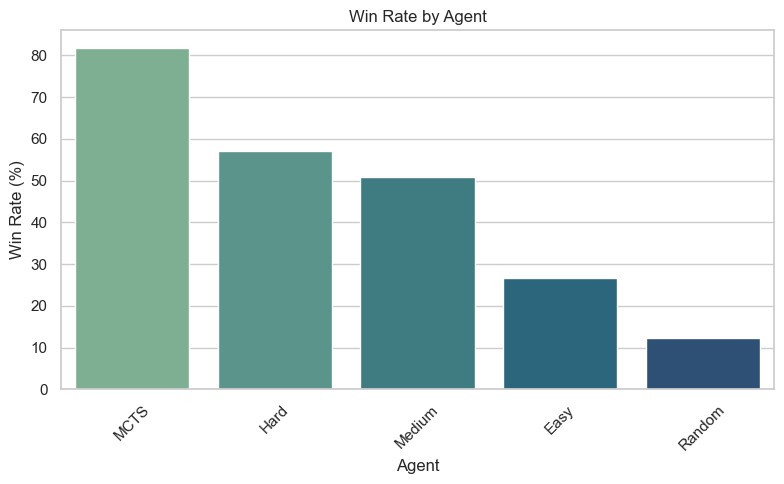

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(x=summary.index, y='Win_Rate (%)', data=summary, palette='crest')
plt.title('Win Rate by Agent')
plt.ylabel('Win Rate (%)')
plt.xlabel('Agent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Huy\AppData\Local\Temp\ipykernel_14492\2203413084.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y='Avg_Duration', data=summary, palette='muted')


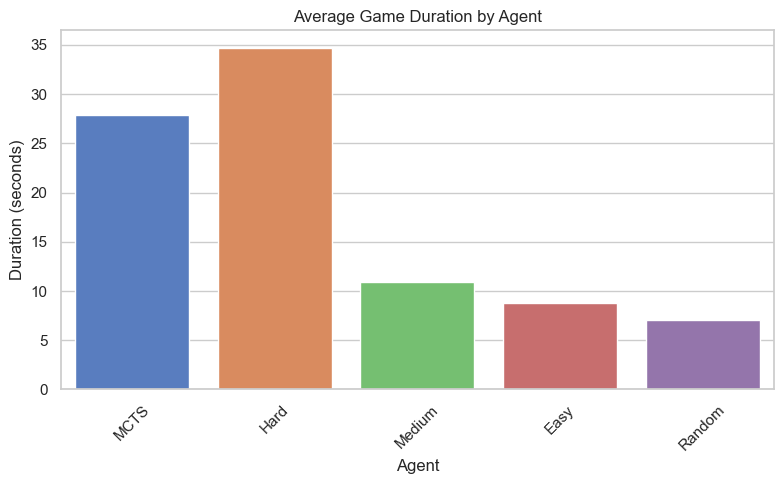

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x=summary.index, y='Avg_Duration', data=summary, palette='muted')
plt.title('Average Game Duration by Agent')
plt.ylabel('Duration (seconds)')
plt.xlabel('Agent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Huy\AppData\Local\Temp\ipykernel_14492\1695236244.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y='Avg_Moves', data=summary, palette='muted')


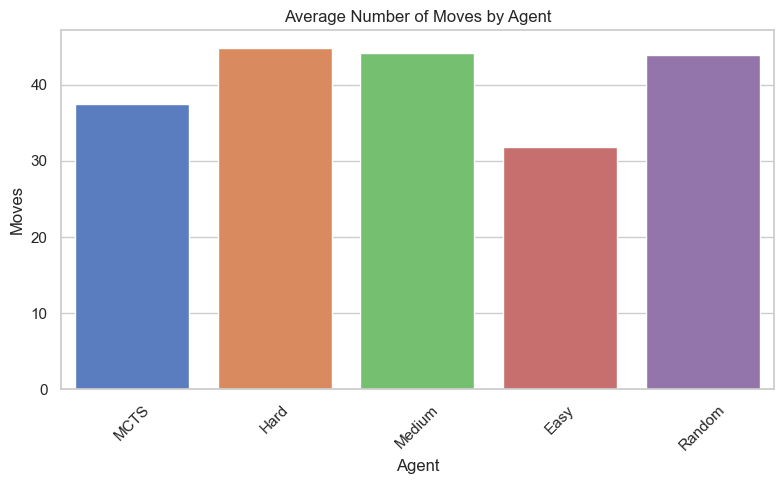

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x=summary.index, y='Avg_Moves', data=summary, palette='muted')
plt.title('Average Number of Moves by Agent')
plt.ylabel('Moves')
plt.xlabel('Agent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
